In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')


plt.style.use("fivethirtyeight")
%matplotlib inline

pd.set_option('display.max_columns', 30)

In [25]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [26]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [27]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [28]:
df.shape

(299, 13)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [30]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [31]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

 1. What is the distribution of age among heart failure patients in the dataset?

In [60]:
df['age'].describe()

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

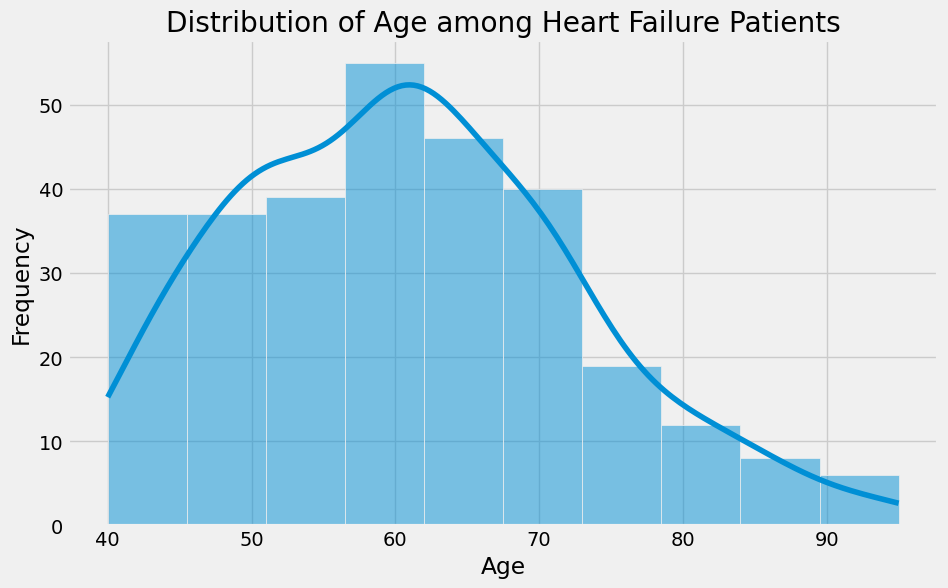

In [48]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'], kde=True)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age among Heart Failure Patients")
plt.show()

2. How does the death rate vary with age?

In [49]:
df.DEATH_EVENT.unique()

array([1, 0], dtype=int64)

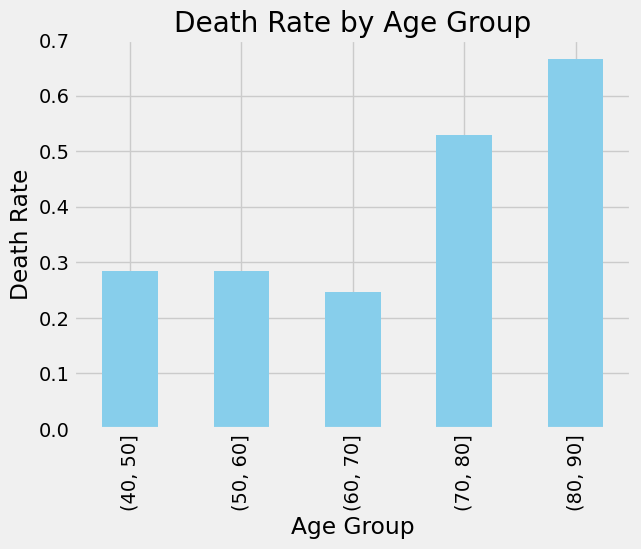

In [75]:
df['age_group'] = pd.cut(df['age'], bins=range(40, 100, 10))
data = df.groupby('age_group')['DEATH_EVENT'].mean()

data.plot(kind='bar', color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Death Rate')
plt.title('Death Rate by Age Group')
plt.show()

3. What is the percentage of male and female patients in the dataset?

In [80]:
df['sex'].value_counts(normalize=True)

1    0.648829
0    0.351171
Name: sex, dtype: float64

In [81]:
# 64% Male and 35% Female

4. How does the platelet count vary among different age groups?

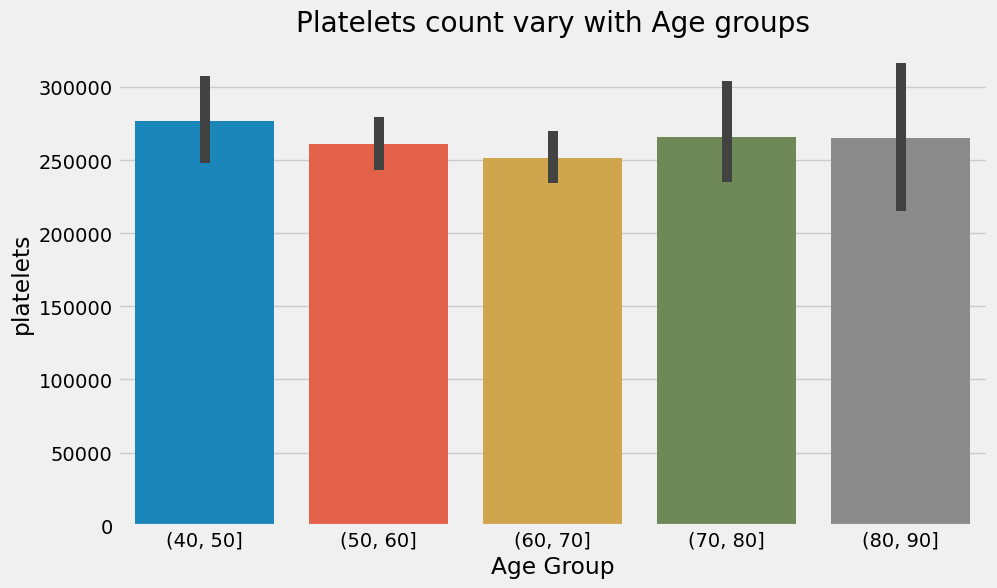

In [97]:
df['age_group'] = pd.cut(df['age'], bins=range(40, 100, 10))

plt.figure(figsize=(10, 6))
sns.barplot(y ='platelets', x ='age_group', data=df)
plt.xlabel('Age Group')
plt.ylabel('platelets')
plt.title('Platelets count vary with Age groups')
plt.show()

5. Is there a correlation between creatinine and sodium levels in the blood?

In [99]:
columns = ['serum_creatinine', 'serum_sodium']
df[columns].corr()

,serum_creatinine,serum_sodium
serum_creatinine,1.000000,-0.189095
serum_sodium,-0.189095,1.000000


In [100]:
# It would be either "yes" if there is a correlation (correlation coefficient close to -1 or 1)
# It would be "no" if there is no significant correlation (correlation coefficient close to 0).

# As it is seems to close to 0 no Correlation between Creatine and Sodium

6.  How does the prevalence of high blood pressure differ between male and female patients?

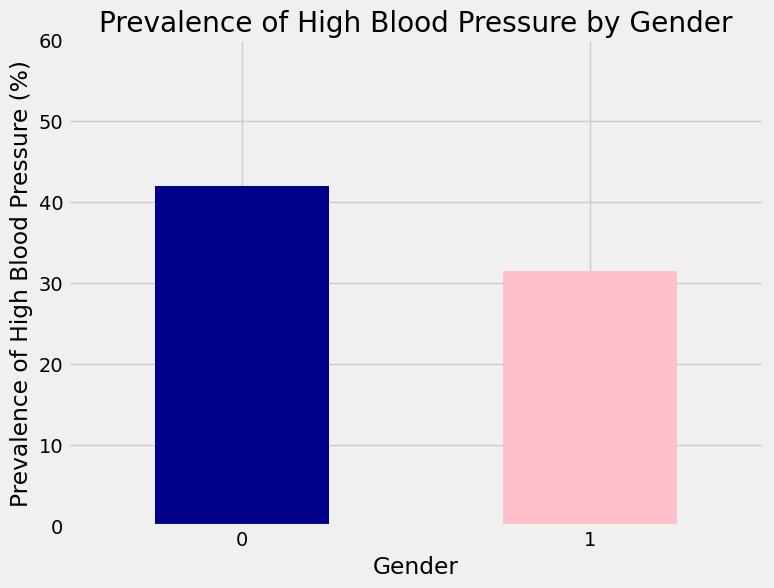

In [114]:
data = df.groupby('sex')['high_blood_pressure'].mean()*100

plt.figure(figsize=(8, 6))
data.plot(kind = 'bar', color = ['darkblue','pink'])
plt.xlabel('Gender')
plt.ylabel('Prevalence of High Blood Pressure (%)')
plt.title('Prevalence of High Blood Pressure by Gender')
plt.xticks(rotation=0)
plt.ylim(0, 60)
plt.show()

7.What is the relationship between smoking habits and the occurrence of heart failure?

<Figure size 800x600 with 0 Axes>

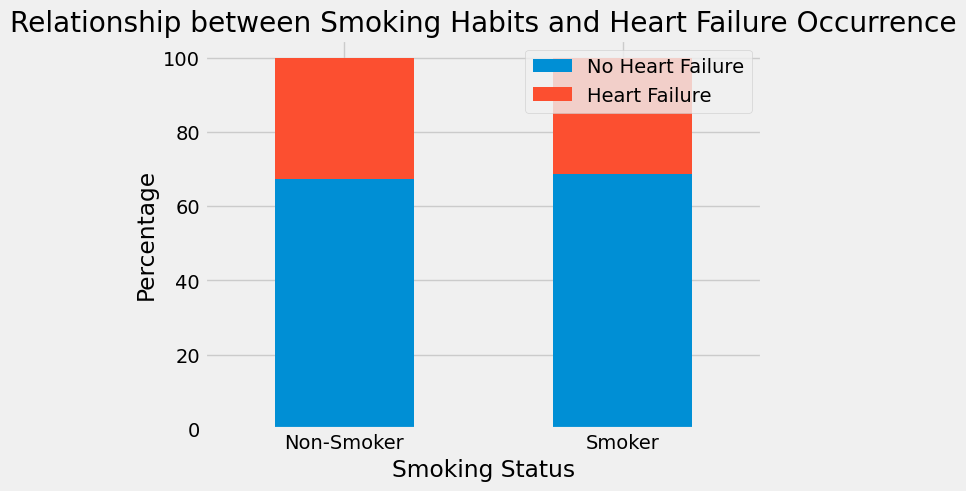

In [126]:
#sns.scatterplot(x= "smoking",y = "DEATH_EVENT", data=df)

cross = pd.crosstab(df['smoking'], df['DEATH_EVENT'], normalize='index') * 100

plt.figure(figsize=(8, 6))
cross.plot(kind = 'bar', stacked = True)
plt.xlabel('Smoking Status')
plt.ylabel('Percentage')
plt.title('Relationship between Smoking Habits and Heart Failure Occurrence')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'], rotation=0)
plt.legend(['No Heart Failure', 'Heart Failure'], loc='upper right')
plt.show()

8. Are there any noticeable patterns in the distribution of death events across different age groups?

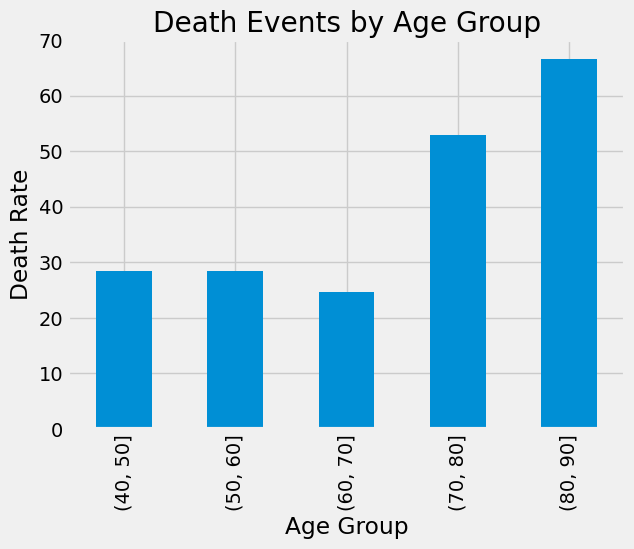

In [131]:
df['age_group'] = pd.cut(df['age'], bins=range(40, 100, 10))
data = df.groupby('age_group')['DEATH_EVENT'].mean()*100

data.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Death Rate')
plt.title('Death Events by Age Group')
plt.show()

In [133]:
# More chance for the people in 80-90 Age Group
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'age_group'],
      dtype='object')

9. Is there any significant difference in ejection fraction between patients with and without diabetes

In [147]:
df.diabetes.unique()

array([0, 1], dtype=int64)

In [146]:
df.ejection_fraction.unique()

array([20, 38, 40, 15, 60, 65, 35, 25, 30, 50, 14, 55, 45, 62, 80, 17, 70],
      dtype=int64)

<Axes: xlabel='diabetes'>

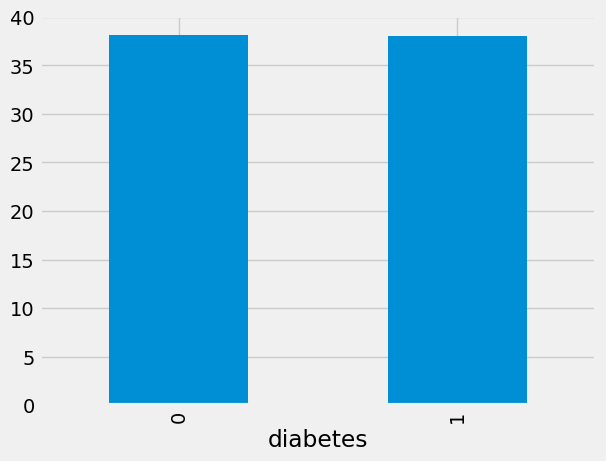

In [150]:
data = df.groupby('diabetes')['ejection_fraction'].mean()
data.plot(kind = 'bar')

In [170]:
ejection_fraction_diabetes = df[df['diabetes'] == 1]['ejection_fraction'].mean()
ejection_fraction_no_diabetes = df[df['diabetes'] == 0]['ejection_fraction'].mean()

In [171]:
ejection_fraction_diabetes

38.016

In [172]:
ejection_fraction_no_diabetes

38.132183908045974

<BarContainer object of 2 artists>

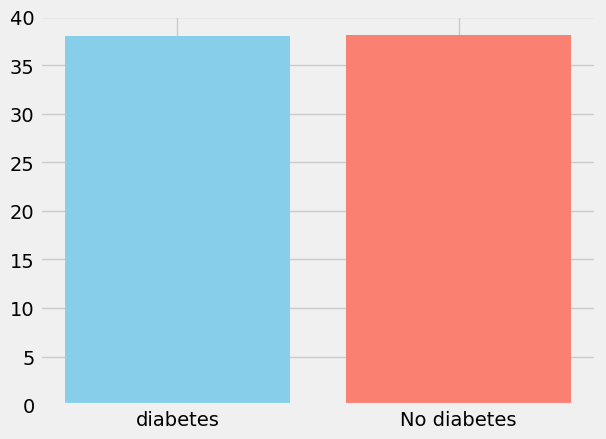

In [173]:
plt.bar(['diabetes', 'No diabetes'], [ejection_fraction_diabetes, ejection_fraction_no_diabetes], color=['skyblue', 'salmon'])

In [160]:
# There is no Significant difference between Ejection with and without diabetes patients

10. How does the serum creatinine level vary between patients who survived and those who did not?

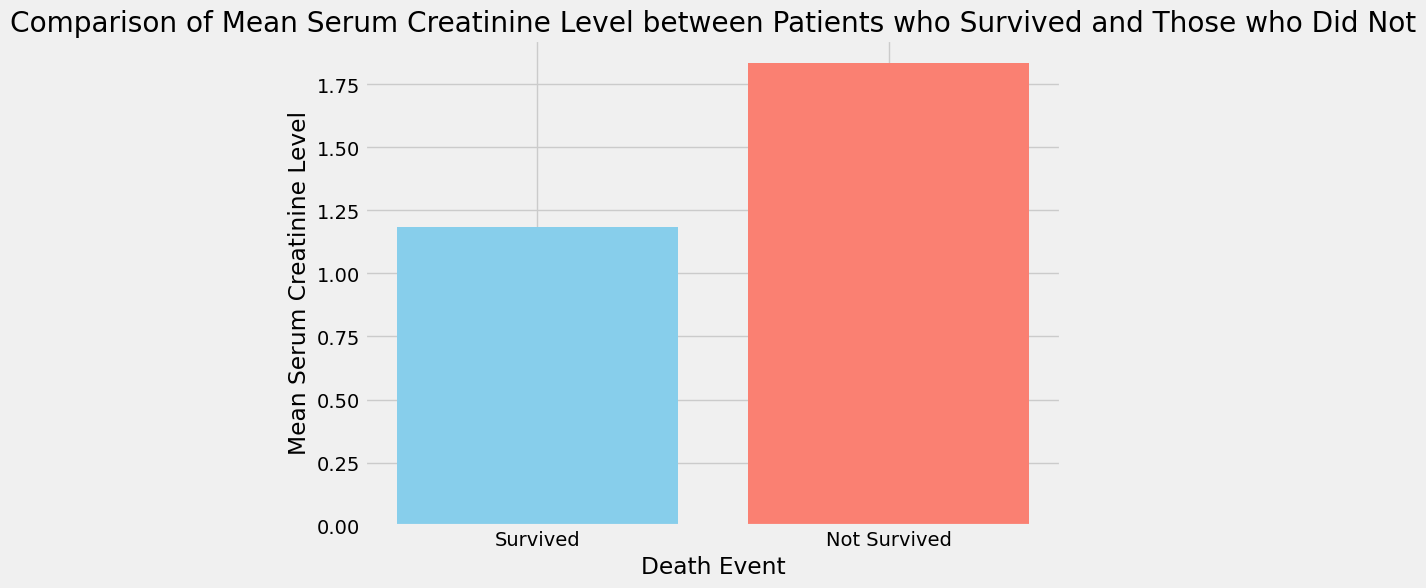

In [176]:
mean_creatinine_survived = df[df['DEATH_EVENT'] == 0]['serum_creatinine'].mean()
mean_creatinine_not_survived = df[df['DEATH_EVENT'] == 1]['serum_creatinine'].mean()


plt.figure(figsize=(8, 6))
plt.bar(['Survived', 'Not Survived'], [mean_creatinine_survived, mean_creatinine_not_survived], color=['skyblue', 'salmon'])
plt.xlabel('Death Event')
plt.ylabel('Mean Serum Creatinine Level')
plt.title('Comparison of Mean Serum Creatinine Level between Patients who Survived and Those who Did Not')
plt.show()